In [165]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Verizon
[9.87830422e-05]
Disney
[0.00069261]
Chevron
[-0.00019659]
Am_express
[7.78730473e-05]
Goldman_Sachs
[0.00034425]
home_depot
[0.00077901]
IBM
[-0.00022169]
Coke
[0.00016523]
jp_morgan
[0.00050907]


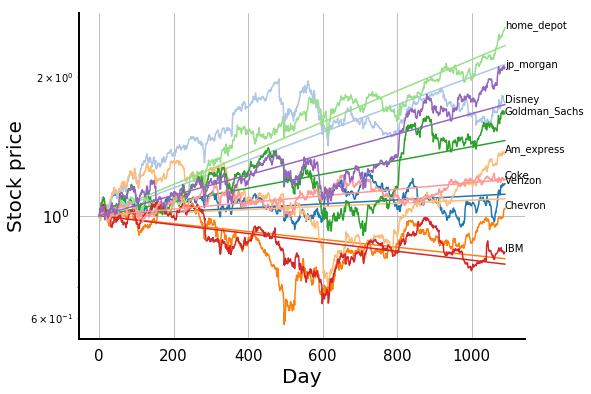

In [257]:
data=pd.read_csv("./data.csv")
names=data.Name.unique()
#data['Fecha']=pd.to_datetime(data.Fecha, format='%d-%m-%Y')
palette = plt.get_cmap('tab20')
num=0
fig, ax = plt.subplots(1,1, figsize=(8,6))
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    s0=np.array(dt.Open)[0]
    s=np.array(dt.Open)
    y=np.array(np.log(s/s0))
    x=np.arange(len(dt))
    model = LinearRegression(fit_intercept=False)
    model.fit(x.reshape((-1, 1)), y)
    mu0=model.coef_
    print(n)
    print(mu0)
    x=np.arange(len(dt))
    trend=np.exp(mu0*x)
    
    plt.plot(x,trend,color=palette(num))
    plt.plot(x,s/s0,color=palette(num))
    plt.text(x[-1],s[-1]/s0,n)
    num+=1
plt.yscale("log")
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Stock price",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Verizon
0.00012183933484006584
0.0037618780534684313
Disney
0.000531355558534855
0.003922811394350512
Chevron
-2.2171335899809867e-06
0.004422770412758414
Am_express
0.0002709237477237478
0.004441440646505747
Goldman_Sachs
0.0004472919579690228
0.004558393390597765
home_depot
0.0008542574280691719
0.003659379912696585
IBM
-0.0001780493331723526
0.0038831024866330093
Coke
0.00016537010867301237
0.002792579627850932
jp_morgan
0.00065741492353708
0.004272517411338171


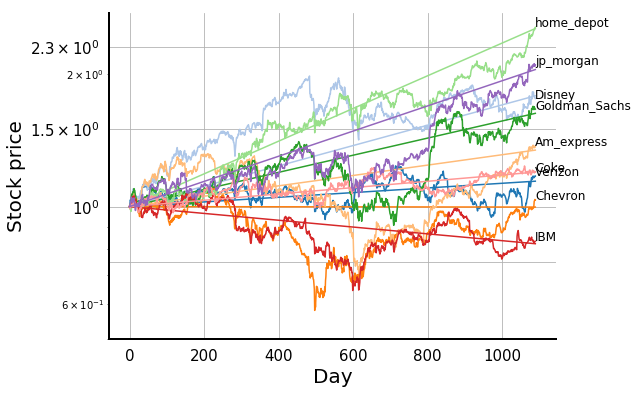

In [288]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
num=0
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    ydot=[]
    yy=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    ss=1
    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        ydot.append(model.coef_)
        ss=ss*np.exp(model.coef_)
        yy.append(model.coef_)

        odfit.append(ss)
        timefit.append(x[i0])
        i0+=1
    #plt.plot(timefit,odfit,color=palette(num))
    plt.plot(x,dt.Open/np.exp(y)[0],color=palette(num))
    plt.text(x[-1],np.exp(y[-1]-y[0]),n,fontsize=12)
    print(n)
    #print(np.log(np.mean(np.exp(yy))))
    print(np.mean(yy))
    print(np.std(yy))
    plt.plot(x,np.exp(np.mean(yy)*x),color=palette(num))
    num+=1
plt.yscale("log")
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Stock price",size=20)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
taqui=[0.5,0.75,1,1.5,2.3]#(np.arange(0,(tmax+1)/doubling_time,step=1)
ax.set_yticks(taqui)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

In [304]:
Covarray=np.zeros([len(names),len(names)])
nn=0
meanret=[]
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    yy=[]

    model = LinearRegression()

    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        yy.append(np.exp(model.coef_[0]))
        i0+=1
    meanret.append(np.mean(yy))
    mm=0
    for m in names:
        dt=data[data.Name==m]
        dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
        dt=dt.sort_values(by='Date',ascending=True)
        y=np.array(np.log(dt.Open))
        x=np.arange(len(y))    
        r=5
        i0=r
        yy2=[]
        model = LinearRegression()
        while i0<len(y)-r:
            tempy=y[i0-r:i0+r]
            tempx=x[i0-r:i0+r].reshape((-1, 1))
            model.fit(tempx, tempy)
            yy2.append(np.exp(model.coef_[0]))
            i0+=1
        #print(yy)
        Covarray[nn,mm]=np.cov(yy,yy2)[0][1]
        mm+=1
        #print(nn,mm)
    nn+=1
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [348]:
e=np.ones_like(meanret)
r=meanret
V=np.linalg.inv(Covarray)
alpha = np.matmul(e,np.matmul(V,e))
beta = np.matmul(e,np.matmul(V,r))
gamma= np.matmul(r,np.matmul(V,r))
xg=(1/alpha)*np.matmul(V,e)
mug=beta/alpha
xd =(1/beta)*np.matmul(V,r)
i=0
print("To minimize the risk,")
for n in names:
   
    print("Invest "+str(np.trunc(100*xg[i]))+"% on "+n)
    i+=1
print("And you will obtain a return of: "+str(np.trunc(100*(mug**365-1)))+"%, at the end of the year") 

To minimize the risk,
Invest 15.0% on Verizon
Invest 11.0% on Disney
Invest -6.0% on Chevron
Invest 4.0% on Am_express
Invest -3.0% on Goldman_Sachs
Invest 10.0% on home_depot
Invest 7.0% on IBM
Invest 48.0% on Coke
Invest 13.0% on jp_morgan
And you will obtain a return of: 12.0%, at the end of the year
